In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from ucimlrepo import fetch_ucirepo 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 
from functools import reduce
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")


In [2]:
automobile = fetch_ucirepo(id=10) 
X = automobile.data.features 
y = automobile.data.targets 


In [3]:
print ("Total number of rows in dataset = {}".format(X.shape[0]))
print ("Total number of columns in dataset = {}".format(X.shape[1]))
print ("Total number of rows in dataset = {}".format(y.shape[0]))
print ("Total number of columns in dataset = {}".format(y.shape[1]))

Total number of rows in dataset = 205
Total number of columns in dataset = 25
Total number of rows in dataset = 205
Total number of columns in dataset = 1


In [4]:
X.head()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [5]:
y.head()

,symboling
0,3
1,3
2,1
3,2
4,2


In [6]:
dfs = [X,y]
X = reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True,
 how='outer'), dfs)
X.head()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [7]:
print('Размерность, нумерация и не числовые значения набора данных (X.info()):\n',X.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [8]:
print('Статистики набора данных (X.describe()):\n',X.describe()) 

Статистики набора данных (X.describe()):
               price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count    201.000000   205.000000  205.000000   203.000000  203.000000   
mean   13207.129353    30.751220   25.219512  5125.369458  104.256158   
std     7947.066342     6.886443    6.542142   479.334560   39.714369   
min     5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%     7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%    10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%    16500.000000    34.000000   30.000000  5500.000000  116.000000   
max    45400.000000    54.000000   49.000000  6600.000000  288.000000   

       compression-ratio      stroke        bore  engine-size  \
count         205.000000  201.000000  201.000000   205.000000   
mean           10.142537    3.255423    3.329751   126.907317   
std             3.972040    0.316717    0.273539    41.642693   
min             7.000000    2.070000    

In [9]:
print('Количество уникальных значений для каждого столбца (X.nunique()):\n', X.nunique()) 

Количество уникальных значений для каждого столбца (X.nunique()):
 price                186
highway-mpg           30
city-mpg              29
peak-rpm              23
horsepower            59
compression-ratio     32
stroke                36
bore                  38
fuel-system            8
engine-size           44
num-of-cylinders       7
engine-type            7
curb-weight          171
height                49
width                 44
length                75
wheel-base            53
engine-location        2
drive-wheels           3
body-style             5
num-of-doors           2
aspiration             2
fuel-type              2
make                  22
normalized-losses     51
symboling              6
dtype: int64


In [10]:
feature_names = X.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(X[column].value_counts(dropna=False))


price
NaN        4
8921.0     2
18150.0    2
8845.0     2
8495.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 187, dtype: int64
highway-mpg
25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64
city-mpg
31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64
peak-rpm
5500.0    37
4800.0    36
5000.0    27
5200.0    23
5400.0    13
6000.0     9
5250.0     7
4500.0     7
5800.0     7
4200.0     5
4150.0     5
4750.0     4
4350.0     4
5100.0     3
4250.0  

In [11]:
feature_names = y.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(y[column].value_counts(dropna=False))


symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
price = imputer.fit_transform(X[['price']])
X['price'] = price
peak_rpm = imputer.fit_transform(X[["peak-rpm"]])
horsepower = imputer.fit_transform(X[['horsepower']])
stroke = imputer.fit_transform(X[['stroke']])
bore = imputer.fit_transform(X[['bore']])
num_of_doors = imputer.fit_transform(X[['num-of-doors']])
normalized_losses = imputer.fit_transform(X[['normalized-losses']])
X['peak-rpm'] = peak_rpm
X['horsepower'] = horsepower
X['stroke'] = stroke
X['bore'] = bore
X['num-of-doors'] = num_of_doors
X['normalized-losses'] = normalized_losses


In [13]:
print('Размерность, нумерация и не числовые значения набора данных (X.info()):\n',X.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [14]:
def convertToNumbers (df,feature):
    label_encoder = preprocessing.LabelEncoder() 
    label_encoder.fit(df[feature]) 
    df[feature]=label_encoder.transform(df[feature])
    return df
feature_names=['fuel-system','engine-type','engine-location','drive-wheels','body-style','aspiration','fuel-type','make']
for f in feature_names:
    X = convertToNumbers(X,f)

In [15]:
X.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,88.6,0,2,0,2.0,0,1,0,122.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,88.6,0,2,0,2.0,0,1,0,122.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,94.5,0,2,2,2.0,0,1,0,122.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,99.8,0,1,3,4.0,0,1,1,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,99.4,0,0,3,4.0,0,1,1,164.0,2


<AxesSubplot:>

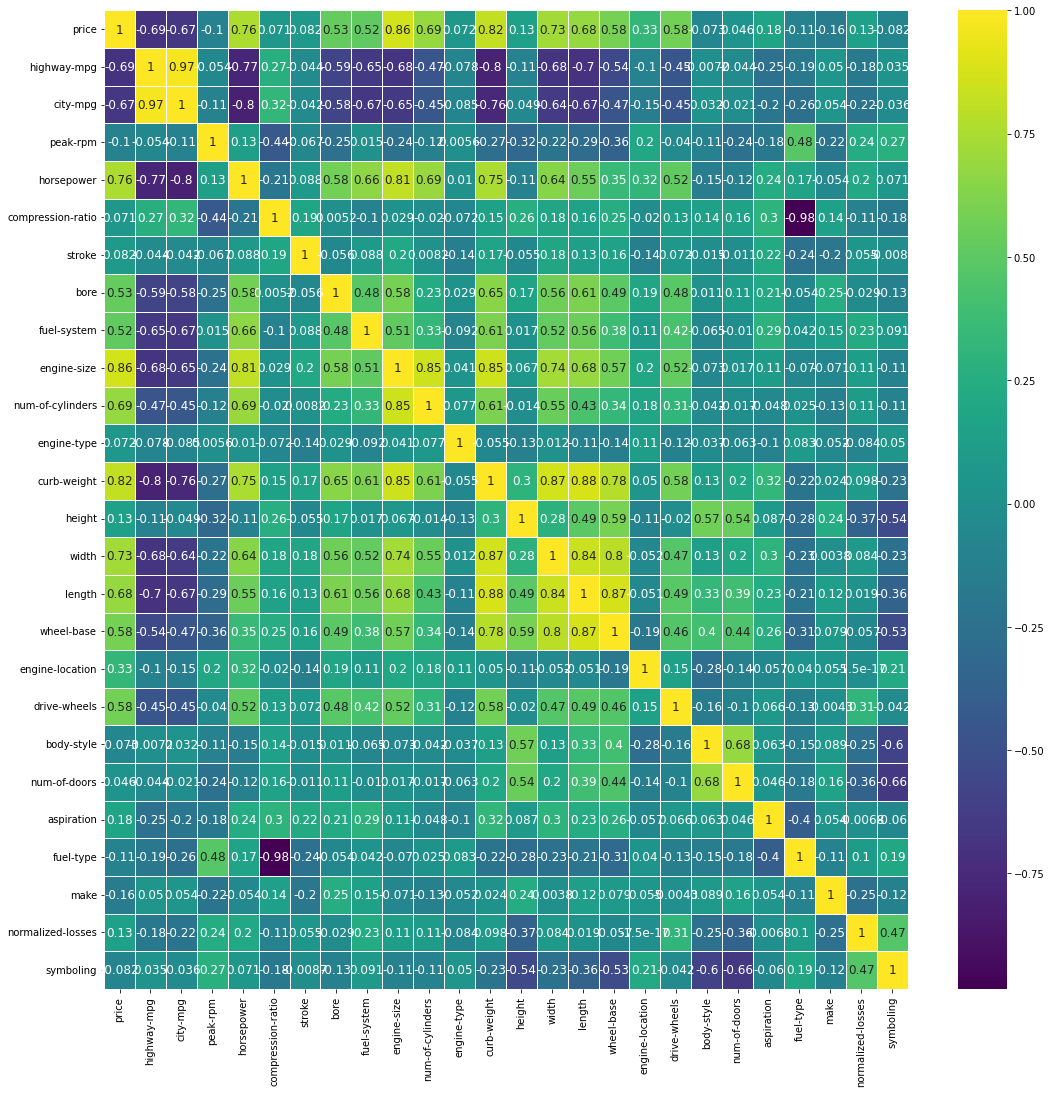

In [16]:
correlation = X.corr()
fig , ax = plt.subplots(figsize = (18,18))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [17]:
X = X.drop(columns=['symboling','price','peak-rpm','stroke','bore','num-of-cylinders','engine-type',
                    'height','engine-location','drive-wheels','aspiration','fuel-type','make',
                    'highway-mpg','compression-ratio','engine-size','curb-weight','width','length'],axis=1)
X.head()


,city-mpg,horsepower,fuel-system,wheel-base,body-style,num-of-doors,normalized-losses
0,21,111.0,5,88.6,0,2.0,122.0
1,21,111.0,5,88.6,0,2.0,122.0
2,19,154.0,5,94.5,2,2.0,122.0
3,24,102.0,5,99.8,3,4.0,164.0
4,18,115.0,5,99.4,3,4.0,164.0


In [18]:
#scale_features_mm = MinMaxScaler() 
#features_MinMaxScaler = scale_features_mm.fit_transform(X) 
#features_MinMaxScaler



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [52]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant).fit()

In [53]:
model.params

const                11.207761
city-mpg             -0.043280
horsepower           -0.006233
fuel-system           0.120558
wheel-base           -0.082837
body-style           -0.324064
num-of-doors         -0.309869
normalized-losses     0.008004
dtype: float64

In [54]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              symboling   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     32.23
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.95e-26
Time:                        19:23:19   Log-Likelihood:                -162.34
No. Observations:                 143   AIC:                             340.7
Df Residuals:                     135   BIC:                             364.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.2078      1.74

1. Коэффициент детерминации R-squared = 0.525, его скорректированная оценка Adj. R-squared = 0.473 - это означает, что регрессионная модель объясняет 48% вариации переменной Y.

2. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 10,09

>расчетный уровень значимости Prob (F-statistic) = 6.43e-15

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

3. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для const, fuel-system, wheel-base,normalized-losses,body-style,num-of-doors,city-mpg,horsepower не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>расчетный уровень значимости P>|t| для peak-rpm,stroke,bore,num-of-cylinders,engine-type,height,engine-location,drive-wheels,aspiration,fuel-type,make превышает 0.05. Нулевая гипотеза не отвергается. peak-rpm,stroke,bore,num-of-cylinders,engine-type,height,engine-location,drive-wheels,aspiration,fuel-type,make,highway-mpg,compression-ratio,fuel-system,engine-size,curb-weight,width,length не являются значимыми.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

4. значение t для peak-rpm,stroke,bore,num-of-cylinders,engine-type,height,engine-location,drive-wheels,aspiration,fuel-type,make очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err.

In [55]:
X_test_with_constant = sm.add_constant(X_test)
y_pred_stat = model.predict(X_test_with_constant)
y_pred

15     0.174774
9      1.587050
100    0.140081
132    1.939530
68    -1.052888
         ...   
56     2.121854
128    2.727326
76     1.561964
144    0.347967
104    2.712730
Length: 62, dtype: float64

In [56]:

def r2(actual: np.ndarray, predicted: np.ndarray):
    """ R2 Score """
    return r2_score(actual, predicted)

def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int_, featurecount: np.int_):
    """ R2 Score """
    return 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount)

In [57]:
print(f'Коэффициент детерминации = {round(r2(y_test, y_pred), 3)}')
print(f'Скорректированный коэффициент детерминации {round(adjr2(y_test, y_pred_stat, len(y_test), X_test.shape[1]), 3)}')

Коэффициент детерминации = 0.663
Скорректированный коэффициент детерминации 0.626


In [58]:
sklearnReg = LinearRegression()
sklearnReg.fit(X_train,y_train)

LinearRegression()

In [59]:
sklearnReg.coef_

array([[-0.04327982, -0.00623292,  0.12055814, -0.08283736, -0.32406445,
        -0.30986924,  0.00800351]])

In [60]:
y_pred_sk = sklearnReg.predict(X_test)

In [61]:
print(f'Коэффициент детерминации = {round(r2(y_test, y_pred_sk), 3)}')
print(f'Скорректированный коэффициент детерминации {round(adjr2(y_test, y_pred_sk, len(y_test), X_test.shape[1]), 3)}')

Коэффициент детерминации = 0.663
Скорректированный коэффициент детерминации 0.626


In [62]:
model.params

const                11.207761
city-mpg             -0.043280
horsepower           -0.006233
fuel-system           0.120558
wheel-base           -0.082837
body-style           -0.324064
num-of-doors         -0.309869
normalized-losses     0.008004
dtype: float64

In [63]:
print(sklearnReg.intercept_)
print(sklearnReg.coef_)

[11.20776107]
[[-0.04327982 -0.00623292  0.12055814 -0.08283736 -0.32406445 -0.30986924
   0.00800351]]


Мы имеем одинаковые коэффицент как в регрессоре statmodels, так и в регрессоре sklearn

Так же как было выше, коэффиценты детерминации и скорректированный коэффициент детерминации обоих моделей имеет следущий результат: 0.663 и 0.626

Вывод: statmodels и sklearn предлагают идентичные модели линейной регрессии